<a href="https://colab.research.google.com/github/MurzinDmitrii/LinearRegression/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузим датасет Iris из библиотеки Scikit-learn.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


Проведем первичный анализ данных, включая исследование структуры данных,
количество строк, столбцов, пропущенных значений и статистический анализ.

In [ ]:
print(data.info())
print(f"Количество строк: {data.shape[0]}")
print(f"Количество столбцов: {data.shape[1]}")
print("Количество пустых значений: ")
print(data.isnull().sum())
print("Информация по таблице: ")
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
Количество строк: 150
Количество столбцов: 5
Количество пустых значений: 
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
Информация по таблице: 
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.3

Используем библиотеки Matplotlib и Seaborn для визуализации данных и
определения возможных зависимостей между переменными. Используем функцию hist для построения гистограмм по данным, pairplot для построения точечных диаграмм и функцию violin для построения скрипичного графика, который позволит оценить распределение данных.

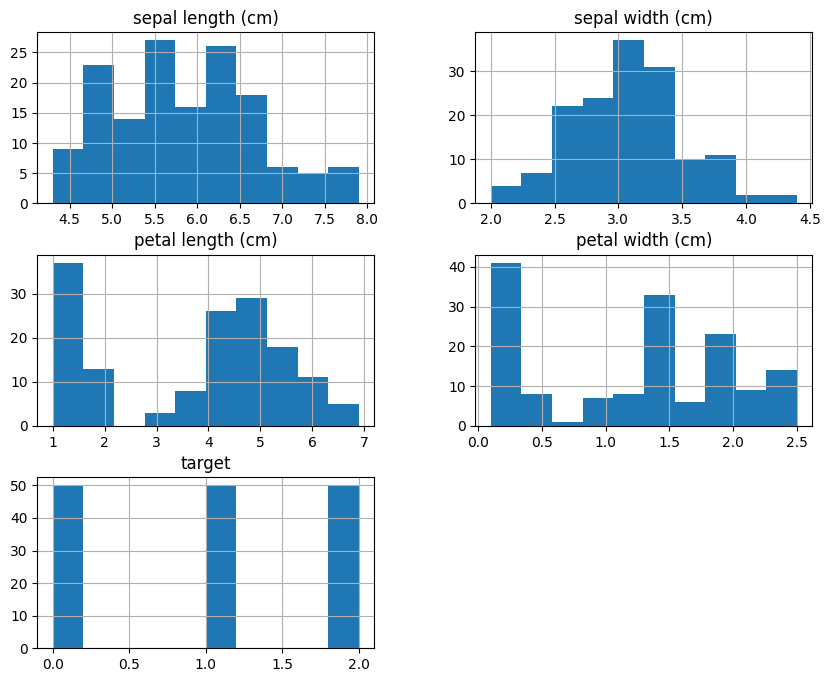

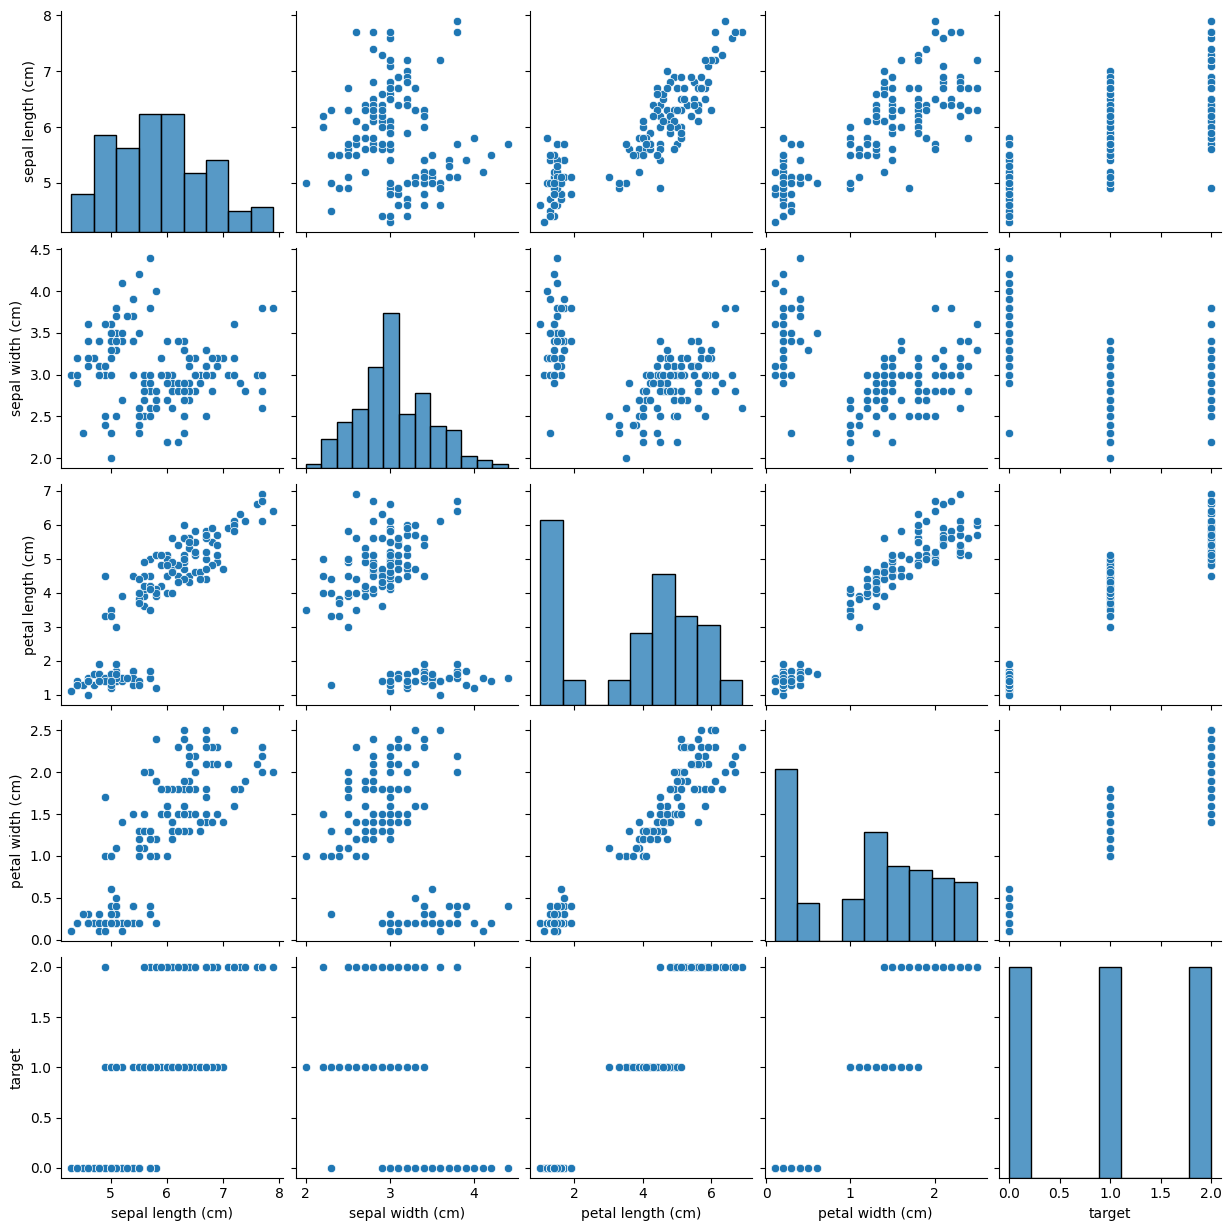

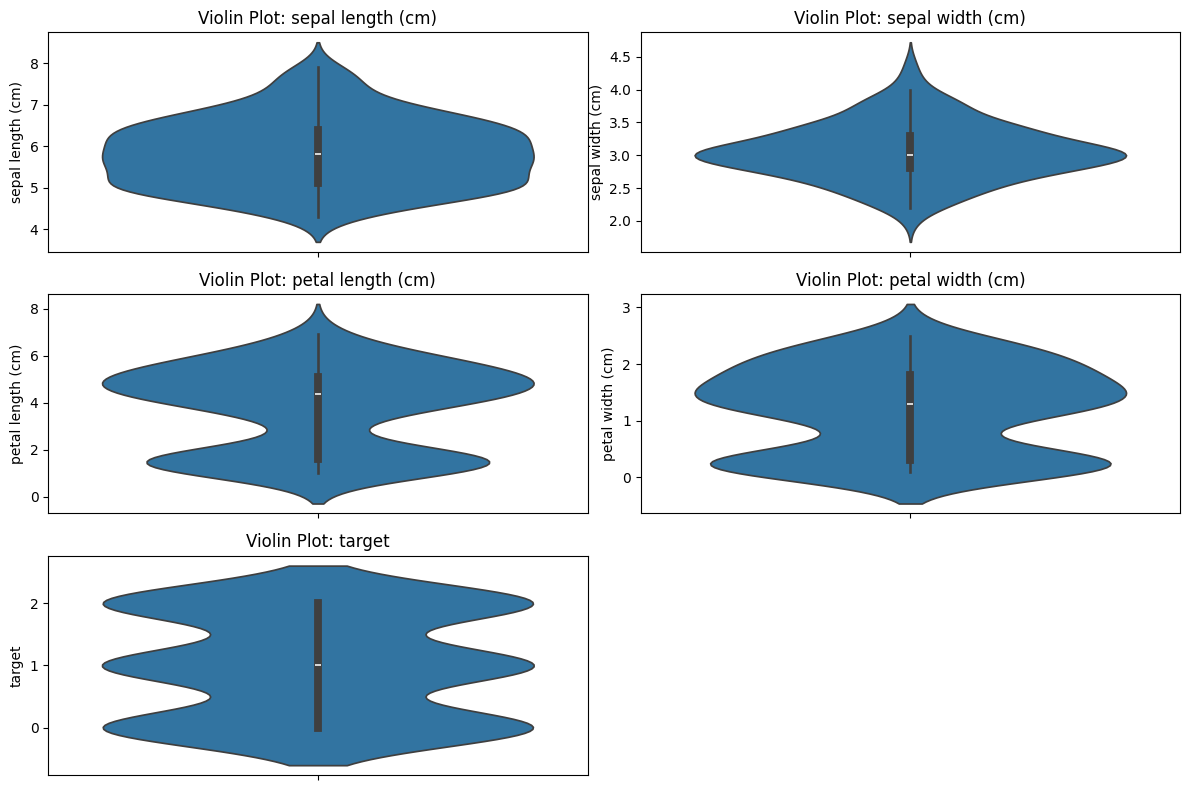

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограммы
data.hist(figsize=(10, 8))
plt.show()

# Pairplot
sns.pairplot(data)
plt.show()

# Violin plots для всех числовых колонок
plt.figure(figsize=(12, 8))
numeric_columns = data.select_dtypes(include=['number']).columns
for i, column in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) + 1) // 2, 2, i)
    sns.violinplot(y=data[column])
    plt.title(f'Violin Plot: {column}')
plt.tight_layout()
plt.show()

Теперь создадим тепловую карту для оценки коллениарности между независимыми переменными

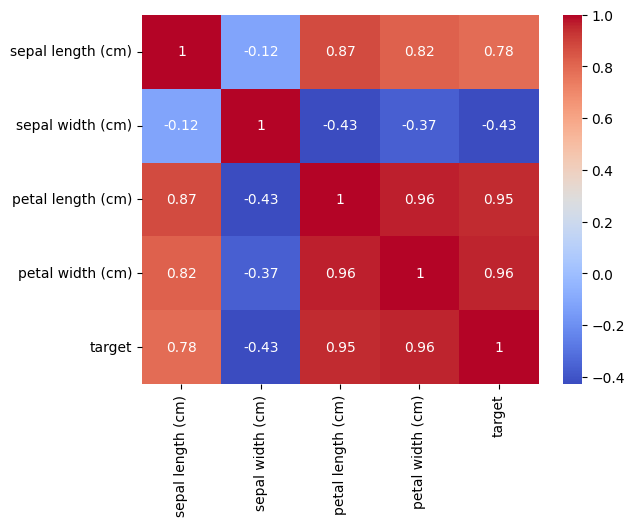

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

По матрице видно что petal length сильно зависит от petal width

Разделим данные на обучающую и тестовую выборки в соотношении 70% на
30%.

In [ ]:
from sklearn.model_selection import train_test_split
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']]
y = data['petal length (cm)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

Создадим и обучим модель линейной регрессии на обучающей выборке, а затем
протестируем её на тестовой выборке

In [ ]:
# Функция линейной регрессии
def linear_regression(X, y):
  X = np.c_[np.ones(X.shape[0]), X]
  beta = np.linalg.lstsq(X, y, rcond=None)[0]
  return beta

# Создание модели
model = linear_regression(X_train.to_numpy(), y_train.to_numpy())

# Получение тестовых данных
X_test_with_bias = np.c_[np.ones(X_test.shape[0]), X_test.to_numpy()]
y_pred = X_test_with_bias.dot(model)
rmse = np.sqrt(np.mean((y_test.to_numpy() - y_pred) ** 2))
mae = np.mean(np.abs(y_test.to_numpy() - y_pred))
r2 = 1 - np.sum((y_test.to_numpy() - y_pred) ** 2) / np.sum((y_test.to_numpy() -
np.mean(y_test.to_numpy())) ** 2)

# Вывод среднеквадратичной ошибки, средней абсолютной ошибки и коэффициента детерминации
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.3303493900573428
MAE: 0.24196868750182654
R2: 0.9676360145907891


Создадим и обучим модель линейной регрессии на обучающей выборке, а затем
протестируем её на тестовой выборке (с использованием Scikit-learn)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод среднеквадратичной ошибки, средней абсолютной ошибки и коэффициента детерминации
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")


RMSE: 0.3303493900573441
MAE: 0.24196868750182748
R2: 0.9676360145907889


Для реализации аналогичной задачи с использованием OpenMP, нам
потребуется установить соответствующие библиотеки и написать программу на
Python.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from joblib import Parallel, delayed
import time

# Загрузка данных
iris = load_iris()
X = iris.data[:, [0, 1, 3]]
y = iris.data[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def linear_regression(X, y):
    X = np.c_[np.ones(X.shape[0]), X]
    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    return beta

# Последовательная версия
start_time = time.time()
model = linear_regression(X_train, y_train)
X_test_with_bias = np.c_[np.ones(X_test.shape[0]), X_test]
y_pred = X_test_with_bias.dot(model)
end_time = time.time()

print(f"Время выполнения без параллелизации: {end_time - start_time} секунд")

# Параллельная версия с OpenMP (через joblib)
start_time_parallel = time.time()

# Разбиваем данные на части
n_jobs = 4  # Количество потоков (аналог size в MPI)
X_splits = np.array_split(X_train, n_jobs)
y_splits = np.array_split(y_train, n_jobs)

# Параллельное вычисление моделей на разных частях данных
all_betas = Parallel(n_jobs=n_jobs)(
    delayed(linear_regression)(X_splits[i], y_splits[i])
    for i in range(n_jobs)
)

# Усредняем коэффициенты
beta_parallel = np.mean(all_betas, axis=0)

# Предсказание и оценка качества
X_test_with_bias = np.c_[np.ones(X_test.shape[0]), X_test]
y_pred_parallel = X_test_with_bias.dot(beta_parallel)

end_time_parallel = time.time()

# Метрики качества
rmse = np.sqrt(np.mean((y_test - y_pred_parallel) ** 2))
mae = np.mean(np.abs(y_test - y_pred_parallel))
r2 = 1 - np.sum((y_test - y_pred_parallel) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")
print(f"Время выполнения с параллелизацией: {end_time_parallel - start_time_parallel} секунд")

# Сравнение результатов
print("\nСравнение коэффициентов:")
print(f"Последовательная модель: {model}")
print(f"Параллельная модель: {beta_parallel}")

Время выполнения без параллелизации: 0.0007255077362060547 секунд
RMSE: 0.3657895203688419
MAE: 0.2637594073342104
R2: 0.9591742152829995
Время выполнения с параллелизацией: 1.9720532894134521 секунд

Сравнение коэффициентов:
Последовательная модель: [-0.2621959   0.72281463 -0.63581649  1.46752403]
Параллельная модель: [-0.25730258  0.72211939 -0.64118501  1.48836895]


Визуализируем результаты прогнозирования с использованием Matplotlib и
Seaborn.

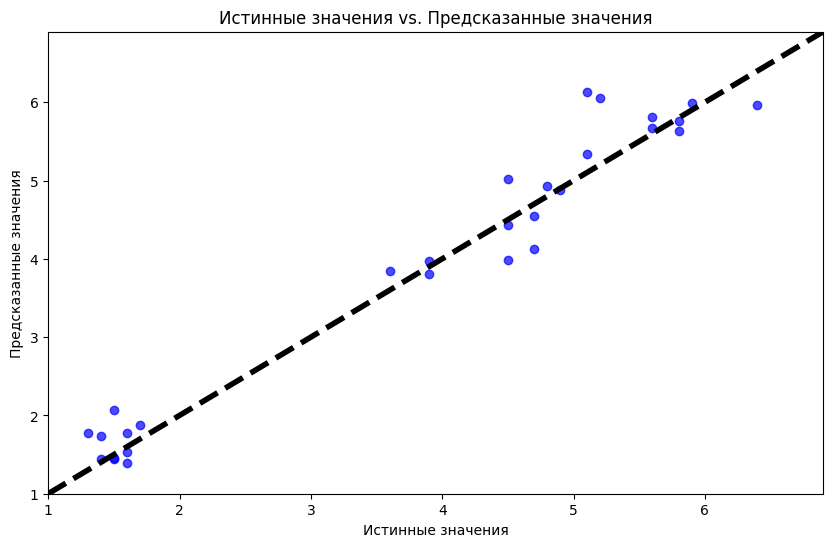

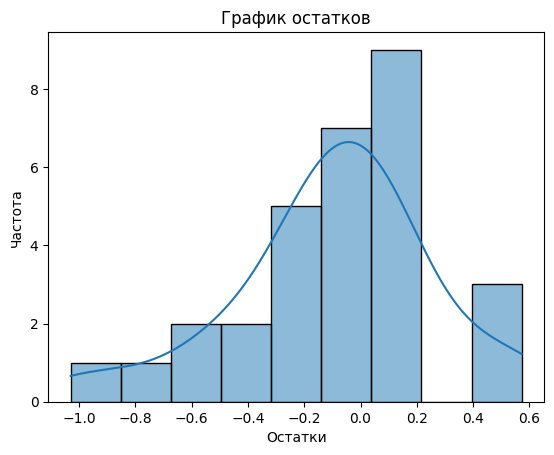

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.title("Истинные значения vs. Предсказанные значения")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])
plt.show()
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Остатки")
plt.ylabel("Частота")
plt.title("График остатков")
plt.show()

Для оценки быстродействия и ускорения с параллельной обработкой, можно
использовать таймеры для измерения времени выполнения кода до и после
параллелизации.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from joblib import Parallel, delayed
import time
import threading
from concurrent.futures import ThreadPoolExecutor

# Загрузка данных
iris = load_iris()
X = iris.data[:, [0, 1, 3]]
y = iris.data[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Функция линейной регрессии (аналог вашей функции)
def linear_regression(X, y):
    X_with_bias = np.c_[np.ones(X.shape[0]), X]
    beta = np.linalg.lstsq(X_with_bias, y, rcond=None)[0]
    return beta

# Последовательная версия
start_time = time.time()
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
end_time = time.time()
print(f"Время выполнения без параллелизации: {end_time - start_time} секунд")

# Ваш оригинальный последовательный подход
start_time = time.time()
beta_sequential = linear_regression(X_train, y_train)
X_test_with_bias = np.c_[np.ones(X_test.shape[0]), X_test]
y_pred_sequential = X_test_with_bias.dot(beta_sequential)
end_time = time.time()
print(f"Время выполнения вашего последовательного метода: {end_time - start_time} секунд")

# Параллельная версия с использованием ThreadPoolExecutor (аналог OpenMP)
def parallel_linear_regression_openmp(X_train, y_train, n_threads=4):
    # Разбиваем данные на части
    X_splits = np.array_split(X_train, n_threads)
    y_splits = np.array_split(y_train, n_threads)

    # Параллельное выполнение на каждом потоке
    with ThreadPoolExecutor(max_workers=n_threads) as executor:
        futures = []
        for i in range(n_threads):
            future = executor.submit(linear_regression, X_splits[i], y_splits[i])
            futures.append(future)

        # Собираем результаты (аналог comm.gather)
        all_betas = [future.result() for future in futures]

    # Усредняем коэффициенты (аналог root=0 процесса)
    beta_parallel = np.mean(all_betas, axis=0)
    return beta_parallel

# Параллельная версия с использованием joblib (более питонический способ)
def parallel_linear_regression_joblib(X_train, y_train, n_jobs=4):
    X_splits = np.array_split(X_train, n_jobs)
    y_splits = np.array_split(y_train, n_jobs)

    all_betas = Parallel(n_jobs=n_jobs)(
        delayed(linear_regression)(X_splits[i], y_splits[i])
        for i in range(n_jobs)
    )

    beta_parallel = np.mean(all_betas, axis=0)
    return beta_parallel

# Запуск параллельных версий
n_threads = 4

# Версия с ThreadPoolExecutor
start_time = time.time()
beta_parallel_1 = parallel_linear_regression_openmp(X_train, y_train, n_threads)
X_test_with_bias = np.c_[np.ones(X_test.shape[0]), X_test]
y_pred_parallel_1 = X_test_with_bias.dot(beta_parallel_1)
end_time = time.time()
print(f"Время выполнения с параллелизацией (ThreadPoolExecutor): {end_time - start_time} секунд")

# Версия с joblib
start_time = time.time()
beta_parallel_2 = parallel_linear_regression_joblib(X_train, y_train, n_threads)
y_pred_parallel_2 = X_test_with_bias.dot(beta_parallel_2)
end_time = time.time()
print(f"Время выполнения с параллелизацией (joblib): {end_time - start_time} секунд")

# Сравнение качества моделей
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    mae = np.mean(np.abs(y_true - y_pred))
    r2 = 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
    return rmse, mae, r2

# Метрики для последовательной модели
rmse_seq, mae_seq, r2_seq = calculate_metrics(y_test, y_pred_sequential)
print(f"\nПоследовательная модель - RMSE: {rmse_seq:.4f}, MAE: {mae_seq:.4f}, R2: {r2_seq:.4f}")

# Метрики для параллельной модели (ThreadPoolExecutor)
rmse_par1, mae_par1, r2_par1 = calculate_metrics(y_test, y_pred_parallel_1)
print(f"Параллельная модель (ThreadPool) - RMSE: {rmse_par1:.4f}, MAE: {mae_par1:.4f}, R2: {r2_par1:.4f}")

# Метрики для параллельной модели (joblib)
rmse_par2, mae_par2, r2_par2 = calculate_metrics(y_test, y_pred_parallel_2)
print(f"Параллельная модель (joblib) - RMSE: {rmse_par2:.4f}, MAE: {mae_par2:.4f}, R2: {r2_par2:.4f}")

# Сравнение коэффициентов
print(f"\nКоэффициенты последовательной модели: {beta_sequential}")
print(f"Коэффициенты параллельной модели (ThreadPool): {beta_parallel_1}")
print(f"Коэффициенты параллельной модели (joblib): {beta_parallel_2}")

Время выполнения без параллелизации: 0.014310359954833984 секунд
Время выполнения вашего последовательного метода: 0.0005974769592285156 секунд
Время выполнения с параллелизацией (ThreadPoolExecutor): 0.002419710159301758 секунд
Время выполнения с параллелизацией (joblib): 0.6332309246063232 секунд

Последовательная модель - RMSE: 0.3606, MAE: 0.2605, R2: 0.9603
Параллельная модель (ThreadPool) - RMSE: 0.3658, MAE: 0.2638, R2: 0.9592
Параллельная модель (joblib) - RMSE: 0.3658, MAE: 0.2638, R2: 0.9592

Коэффициенты последовательной модели: [-0.2621959   0.72281463 -0.63581649  1.46752403]
Коэффициенты параллельной модели (ThreadPool): [-0.25730258  0.72211939 -0.64118501  1.48836895]
Коэффициенты параллельной модели (joblib): [-0.25730258  0.72211939 -0.64118501  1.48836895]
